# Exercise 1.1 Kohen-network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom


### Load and transform data

In [ ]:
# Load dataset:
df = pd.read_csv("/Users/monahelness/72.27-SIA-8/TP4/exercise1/data/europe.csv") #edit to fit your own path,right click on the europe file and copy + past the path 
df.head()

# Clean/transform dataset:

# Keep country names for reference
countries = df["Country"].values

# Select numerical columns only
X = df.drop("Country", axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check shape
X_scaled.shape

(28, 7)

### Train SOM (Self-Organizing Map)

In [8]:
# Initialize SOM
som = MiniSom(x=5, y=5, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_scaled)

# Train SOM
som.train(X_scaled, num_iteration=1000)

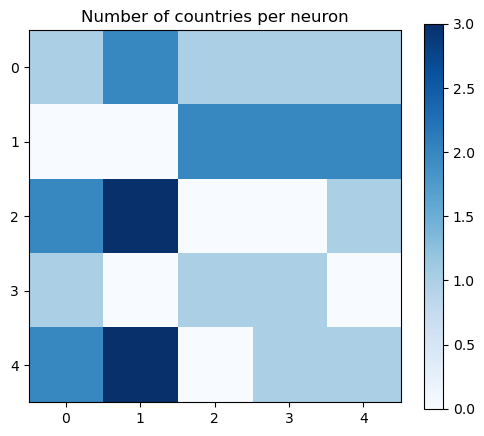

In [9]:
# Number of countries per neuron:

mapping = som.win_map(X_scaled)

heatmap = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        heatmap[i, j] = len(mapping.get((i, j), []))

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.imshow(heatmap, cmap='Blues')
plt.title('Number of countries per neuron')
plt.colorbar()
plt.show()


### U - Matrix

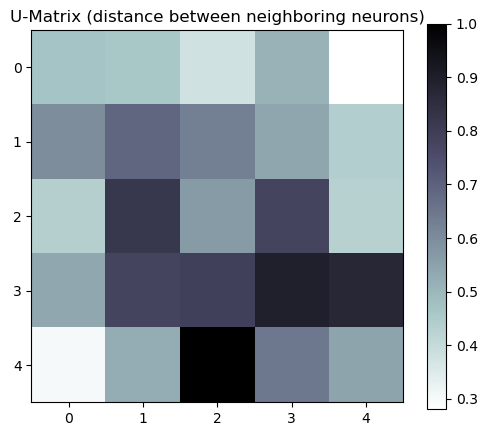

In [10]:
plt.figure(figsize=(6, 5))
plt.imshow(som.distance_map().T, cmap='bone_r')
plt.title('U-Matrix (distance between neighboring neurons)')
plt.colorbar()
plt.show()


### Distribution of the countries

Neuron (0,0): ['Luxembourg']
Neuron (0,1): ['Iceland', 'Ireland']
Neuron (0,2): ['Slovakia']
Neuron (0,3): ['Croatia']
Neuron (0,4): ['Bulgaria']
Neuron (1,2): ['Czech Republic', 'Slovenia']
Neuron (1,3): ['Hungary', 'Lithuania']
Neuron (1,4): ['Estonia', 'Latvia']
Neuron (2,0): ['Germany', 'Sweden']
Neuron (2,1): ['Finland', 'Italy', 'United Kingdom']
Neuron (2,4): ['Ukraine']
Neuron (3,0): ['Norway']
Neuron (3,2): ['Portugal']
Neuron (3,3): ['Poland']
Neuron (4,0): ['Netherlands', 'Switzerland']
Neuron (4,1): ['Austria', 'Belgium', 'Denmark']
Neuron (4,3): ['Spain']
Neuron (4,4): ['Greece']


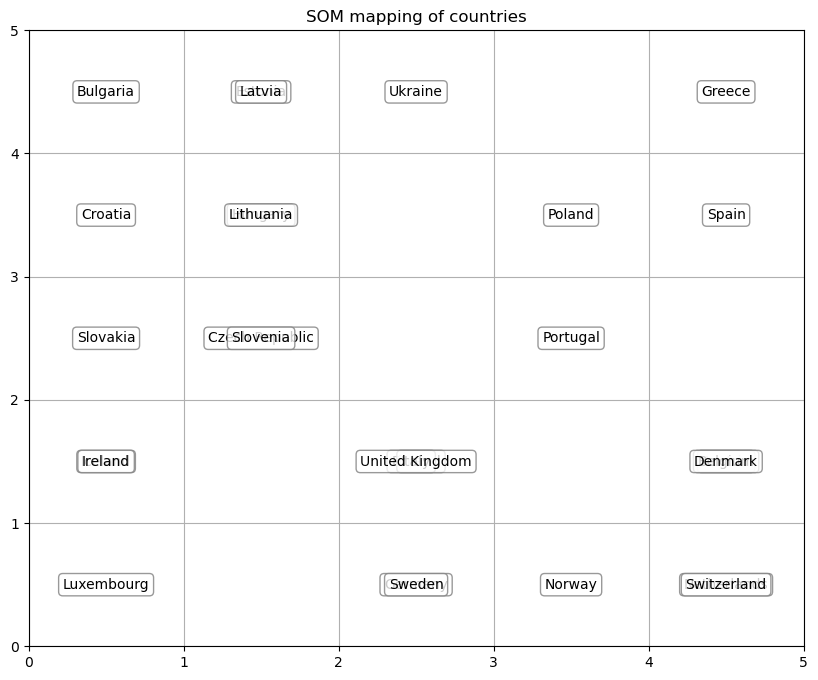

In [ ]:
# Which countries got connected to which neurons 
for i in range(5):
    for j in range(5):
        if (i, j) in mapping:
            land_idx = [np.where((X_scaled == row).all(axis=1))[0][0] for row in mapping[(i, j)]]
            print(f"Neuron ({i},{j}): {[countries[idx] for idx in land_idx]}")
